<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

### Abstract

The thyroid gland is a vascular gland that secretes two hormones which help in supervising the metabolism of the body. The two Types of Thyroid disorders are Hyper thyroidism and Hypothyroidism. When this disorder occurs in the body, they release some hormones which imbalances the body metabolism. Thyroid related (T3 Uptake test) is used to detect this disease. Machine learning plays vital role in the disease prediction. We will use Different Machine Learning algorithms like Logistic Regression, Support Vector Machine(SVM), Decision Tree, Kmeans Clustering to predict the person's risk of getting thyroid disease.

### Importing all the necessary libraries and modules 

In [1]:
import pandas as pd                                                     #import pandas
import numpy as np                                                      #import numpy 
import matplotlib.pyplot as plt                                         #import matplotlib.pyplot
import seaborn as sns                                                   #import seaborn
from sklearn.model_selection import train_test_split                    #import test_split from sklearn
from sklearn.linear_model import LogisticRegression                     #import logistic regression
from sklearn.metrics import classification_report, confusion_matrix     #importin classification report and confusion matrix
from sklearn import metrics                                             #import metrices from sklearn
from sklearn.tree import DecisionTreeClassifier                         #import decision tree from sklearn tree
from sklearn.svm import SVC                                             #import SVC from support vector machine 
from sklearn.model_selection import GridSearchCV                        #import gridsearchcv for tuning
from sklearn.cluster import KMeans                                      #import Kmeans cluster
from sklearn import tree                                                #import tree from sklearn

### Read Dataset

#### Column names of the given dataset
  - ***TSH   -- Thyroid Simulating Harmone,***                                              
  - ***TSTI  -- Total Serum Tri Iodothyronine,***                                        
  - ***TST   -- Total Serum Thyroxin,***                                                                                           
  - ***T3    -- T3-Resign Uptake Test***                                                                                          
  - ***Maximal Absolute Difference***

In [2]:
file=pd.read_csv('thyroid.csv')                                                  #reading the file
file.columns=['T3','TST','TSTI','TSH','Maximal Absolute Difference','Label']     #addigng column names
file.head()                                                                      #previewing the head

,T3,TST,TSTI,TSH,Maximal Absolute Difference,Label
0,113,9.9,3.1,2.0,5.9,1
1,127,12.9,2.4,1.4,0.6,1
2,109,5.3,1.6,1.4,1.5,1
3,105,7.3,1.5,1.5,-0.1,1
4,105,6.1,2.1,1.4,7.0,1


In [3]:
file.describe()                       #previewing the statistical info the given dataset

,T3,TST,TSTI,TSH,Maximal Absolute Difference,Label
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,109.607477,9.803271,2.049533,2.889252,4.206075,1.443925
std,13.175063,4.708332,1.422777,6.130868,8.088786,0.727808
min,65.000000,0.500000,0.200000,0.100000,-0.700000,1.000000
25%,103.000000,7.100000,1.325000,1.000000,0.525000,1.000000
50%,110.000000,9.200000,1.700000,1.300000,2.000000,1.000000
75%,117.750000,11.300000,2.200000,1.700000,4.100000,2.000000
max,144.000000,25.300000,10.000000,56.400000,56.300000,3.000000


In [4]:
file.info()                   #previewing the complete info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   T3                           214 non-null    int64  
 1   TST                          214 non-null    float64
 2   TSTI                         214 non-null    float64
 3   TSH                          214 non-null    float64
 4   Maximal Absolute Difference  214 non-null    float64
 5   Label                        214 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


##### Preparing the Label

In [5]:
p=file['Label']                     #preparing the label
p=pd.DataFrame(p)                   #converting into dataframe
p.head()                            #previewing head

,Label
0,1
1,1
2,1
3,1
4,1


### Exploratory Analysis

#### Check for Missing Data

In [6]:
nulldata=pd.DataFrame(file.isnull().sum())         #checking for null values in the data
nulldata.columns=['Null values']                   #Remaning the column
nulldata                                           #previewing the data

,Null values
T3,0
TST,0
TSTI,0
TSH,0
Maximal Absolute Difference,0
Label,0


#### Pairplot for the given dataset

<Figure size 1080x576 with 0 Axes>

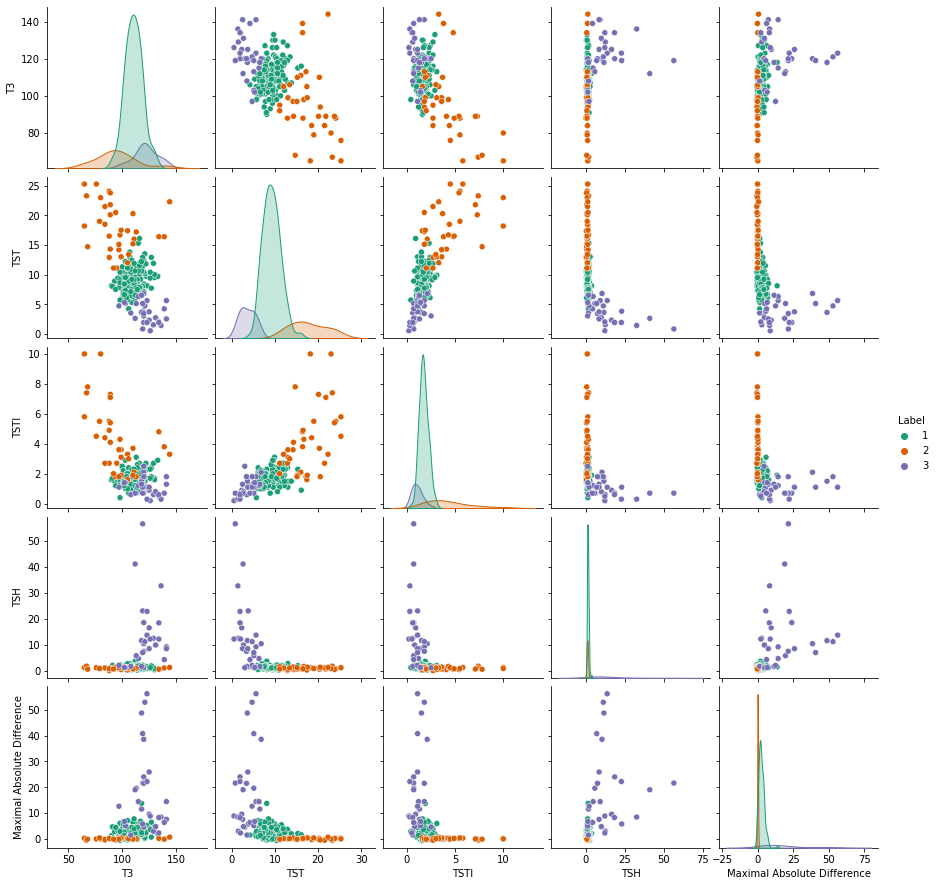

In [7]:
plt.figure(figsize=(15,8))
sns.pairplot(file, hue='Label',palette='Dark2')             #plotting pairplot for the dataset wrt label
plt.show()                                                  #previewing

#### Observation from the above pairplot
Basically the pairplot is used to find the relationship of varibale in the Given dataset.TST and TSTI are highly correlated with eachother, as well as T3 Uptake test also playing vital role in classification of throid gland.

#### Plotting labels on the countplot

Text(0.5, 1.0, 'Countplot of Labels')

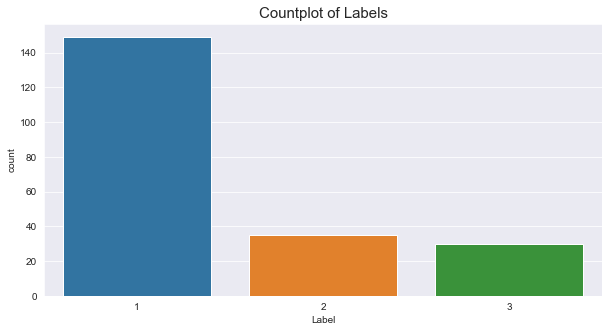

In [8]:
plt.figure(figsize=(10,5))                      #resizing the figure
sns.set_style('darkgrid')                       #setting the darkgrid background
sns.countplot(x='Label',data=file)              #plotting counplot for the label
plt.title('Countplot of Labels',fontsize=15)    #adding title

#### Observation from the countplot
We got the clear idea about the number of persons are having normal thyroid gland, Hyper gland as well as Hypo gland from the count plot.

#### Plotting histogram for T3-Resign Uptake Percentage

<AxesSubplot:xlabel='T3', ylabel='Count'>

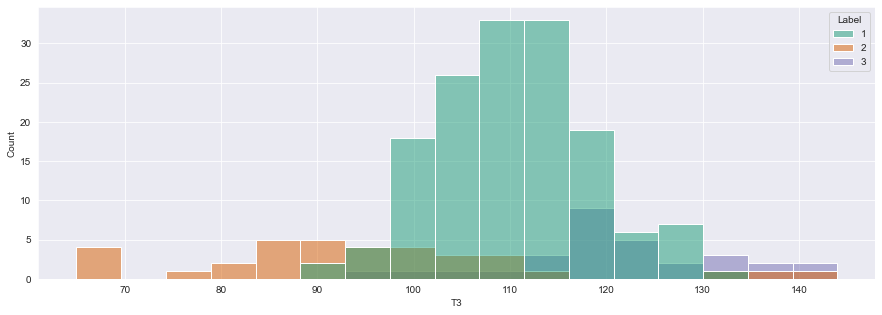

In [9]:
plt.figure(figsize=(15,5))                                                               #resizing the graph
sns.histplot(data=file, x="T3", hue="Label",palette='Dark2')    #Plotting the histogram for maximal absolute difference wrt label

#### Observation from the above Histplot
From The above plot we came to conclusion that in addition to TSTI,TS.T3 is also useful in classification of thyroid gland.
We can conclude that T3 is very high for the class 1 and very low for class 3 and the class2 will be keep on fluctuating between those two

#### Plotting Count plot for the Total Serum Tri Idothyroxin

Text(0.5, 0, 'Total serum triiodothyronine')

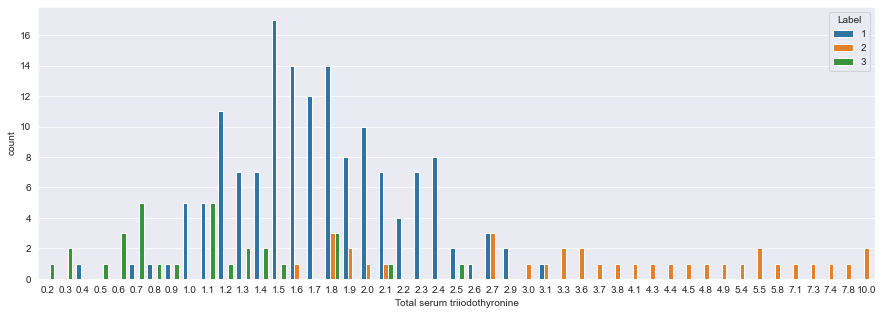

In [10]:
plt.figure(figsize=(15,5))                     #resizing the graph
sns.set_style('darkgrid')                      #Setting the background style of the graph to darkgrid
sns.countplot(x='TSTI',hue='Label',data=file)  #counplot of TSTI wrt Label
plt.xlabel("Total serum triiodothyronine")     #x labelling

#### Observation from the above countplot
Getting an idea about TSTI for all the three types of thyroid glands

#### Plotting histogram for Maximal Absolute Difference

<AxesSubplot:xlabel='Maximal Absolute Difference', ylabel='Count'>

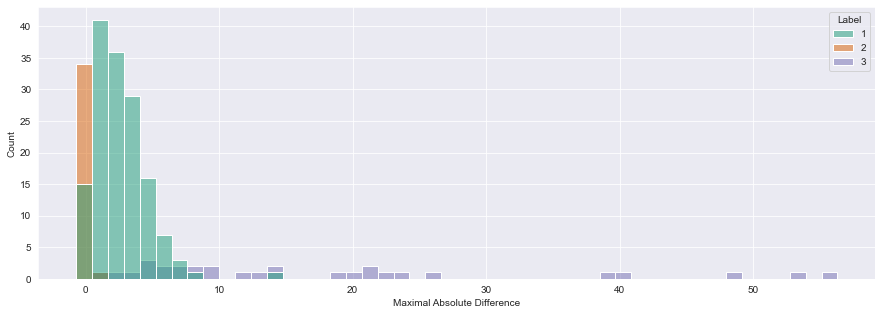

In [11]:
plt.figure(figsize=(15,5))                                                               #resizing the graph
sns.histplot(data=file, x="Maximal Absolute Difference", hue="Label",palette='Dark2')    #Plotting the histogram for maximal absolute difference wrt label

##### Observation from the above Histogram
We got a clear idea about the TSH difference(Maximal Absolute Difference) for the classification of thyroid glands

#### Boxen plot for range of TST for the three glands

<AxesSubplot:xlabel='Label', ylabel='TST'>

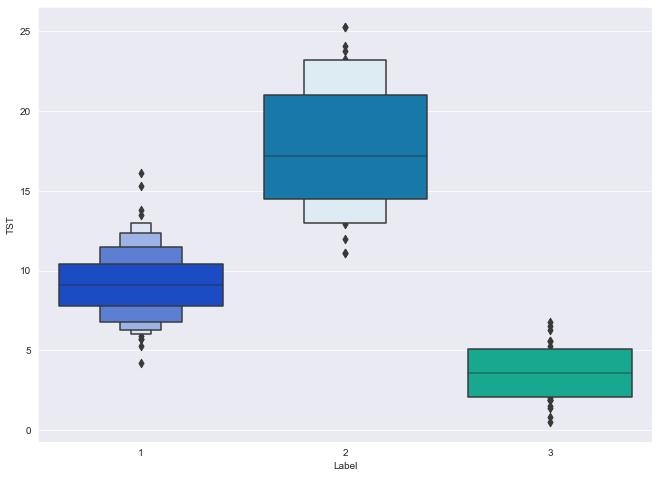

In [12]:
plt.figure(figsize=(11,8))                                   #resizing the graph
sns.boxenplot(y='TST',x='Label',data=file,palette='winter')  #Plotting Boxenplot for TSH wrt Label

#### Observation from the above boxenplot
If the TST is in range if 5-15 then it is normal gland, if the TST is greater than 15 then it is called as Hyper thyroid gland and if the TST is less than 5 then is considered as Hypo thyroid gland

#### In conclusion, Inferences drawn from the exploratory analysis are:
- TST, TSTI, TSH, T3, Maximal Absolute Difference are the efficient columns to train and test the model.
- TST and TSTI are highly correlated So one of them can be used for classification
- If TST value is Less than 5 then it is HYPO Gland, if it is in range of 5 to 15 then is normal gland, if it is greater than 15 then it is HYPER

### Removing the output columns

In [13]:
file.drop('Label',inplace=True,axis=1)     #removing the output variable
file.head()                                #previewing the head

,T3,TST,TSTI,TSH,Maximal Absolute Difference
0,113,9.9,3.1,2.0,5.9
1,127,12.9,2.4,1.4,0.6
2,109,5.3,1.6,1.4,1.5
3,105,7.3,1.5,1.5,-0.1
4,105,6.1,2.1,1.4,7.0


#### Correlation matrix

<AxesSubplot:>

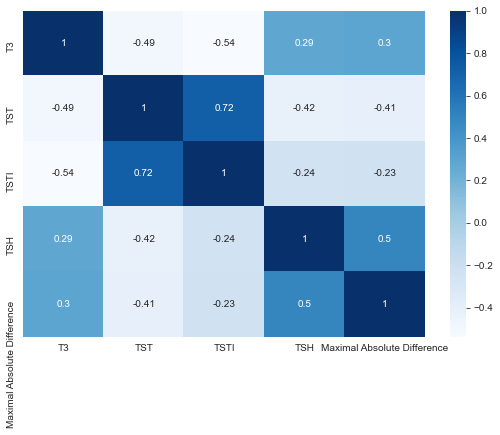

In [14]:
plt.figure(figsize=(9,6))                            #resizing the matrix
sns.heatmap(file.corr(),annot=True,cmap="Blues")     #plotting correlation matrix

### Split Data for Training and Testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(file,p,test_size=0.30)    #spliting the data into test data and train data

### Apply different Classification Algorithms and tune them

### Logistic Regression

##### Traning the model

In [16]:
logisticmodel = LogisticRegression(max_iter=1000)        
logisticmodel.fit(X_train,y_train)       #fitting the train data and training the model

C:\Users\vamse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

##### Predicting the label

In [17]:
logistic_predictions = logisticmodel.predict(X_test)        #predicting the label 
logistic_predictions                                        #previeing the predictions

array([2, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 3,
       1, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1],
      dtype=int64)

##### Comparison

In [18]:
actual=y_test['Label']                                                            # Making a copy of label test data into actual data
comparison = pd.DataFrame({"Actual":actual,"Predicted":logistic_predictions})     # making them into a dataframe
comparison                                                                        # Previewing the Dataframe

,Actual,Predicted
162,2,2
183,2,2
9,1,3
100,1,1
177,2,2
...,...,...
139,1,1
105,1,1
133,1,1
109,1,1


### Evaluation of logistic Regression

##### Confusion Matrix

<AxesSubplot:>

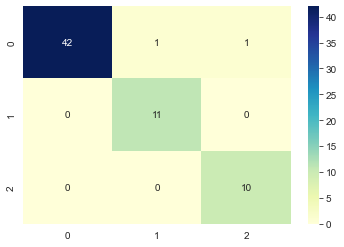

In [19]:
#logistic
cnf_matrix=confusion_matrix(y_test,logistic_predictions)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

##### Classification report

In [20]:
print(classification_report(y_test,logistic_predictions))  # printing classification report

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        44
           2       0.92      1.00      0.96        11
           3       0.91      1.00      0.95        10

    accuracy                           0.97        65
   macro avg       0.94      0.98      0.96        65
weighted avg       0.97      0.97      0.97        65



##### Storing the Accuracy of Logistic Regression

In [21]:
Logistic_Accuracy=metrics.accuracy_score(y_test,logistic_predictions)    #storing the accuaracy of the logistic algorithm

##### Scatterplot of Actual  and Predicted Thyroid Glands

Text(0.5, 1.0, 'Scatterplot of Actual and predicted Clicks')

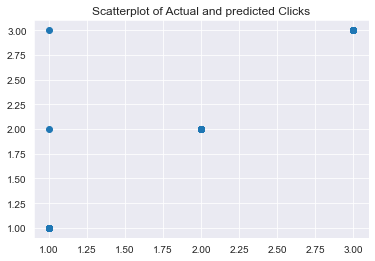

In [22]:
plt.scatter(y_test,logistic_predictions)                             #plotting the scatter plot graph aganist actual vs predicted clicks
plt.title("Scatterplot of Actual and predicted Clicks")              #adding title

### Decision Tree

##### Initializing the model

In [23]:
# max_depth refers to the level in tree
model = DecisionTreeClassifier(max_depth = 6,random_state = 0,criterion = "entropy")   #initializing the classifier

##### Training the Model

In [24]:
model.fit(X_train, y_train)                           # training model

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

##### Predicting the label

In [25]:
decision_predictions=model.predict(X_test)   # predicting output values for corresponding test data

##### Comparison

In [26]:
actual=y_test['Label']                                                            # Making a copy of label test data into actual data
comparison = pd.DataFrame({"Actual":actual,"Predicted":decision_predictions})     # making them into a dataframe
comparison                                                                        # Previewing the Dataframe

,Actual,Predicted
162,2,2
183,2,1
9,1,3
100,1,1
177,2,2
...,...,...
139,1,3
105,1,1
133,1,1
109,1,2


### Evaluation

##### Confusion matrix of Decision Tree

<AxesSubplot:>

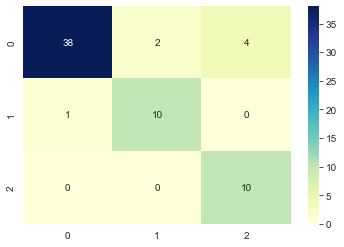

In [27]:
#Decision Tree
cnf_matrix=confusion_matrix(y_test,decision_predictions)                # getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

##### Classification Report

In [28]:
print(classification_report(y_test,decision_predictions))      #printing the classification report

              precision    recall  f1-score   support

           1       0.97      0.86      0.92        44
           2       0.83      0.91      0.87        11
           3       0.71      1.00      0.83        10

    accuracy                           0.89        65
   macro avg       0.84      0.92      0.87        65
weighted avg       0.91      0.89      0.90        65



##### Storing Accuracy

In [29]:
Decision_Accuracy=metrics.accuracy_score(y_test,decision_predictions)     #storing the Accuracy of Decision tree 

##### Decision Tree

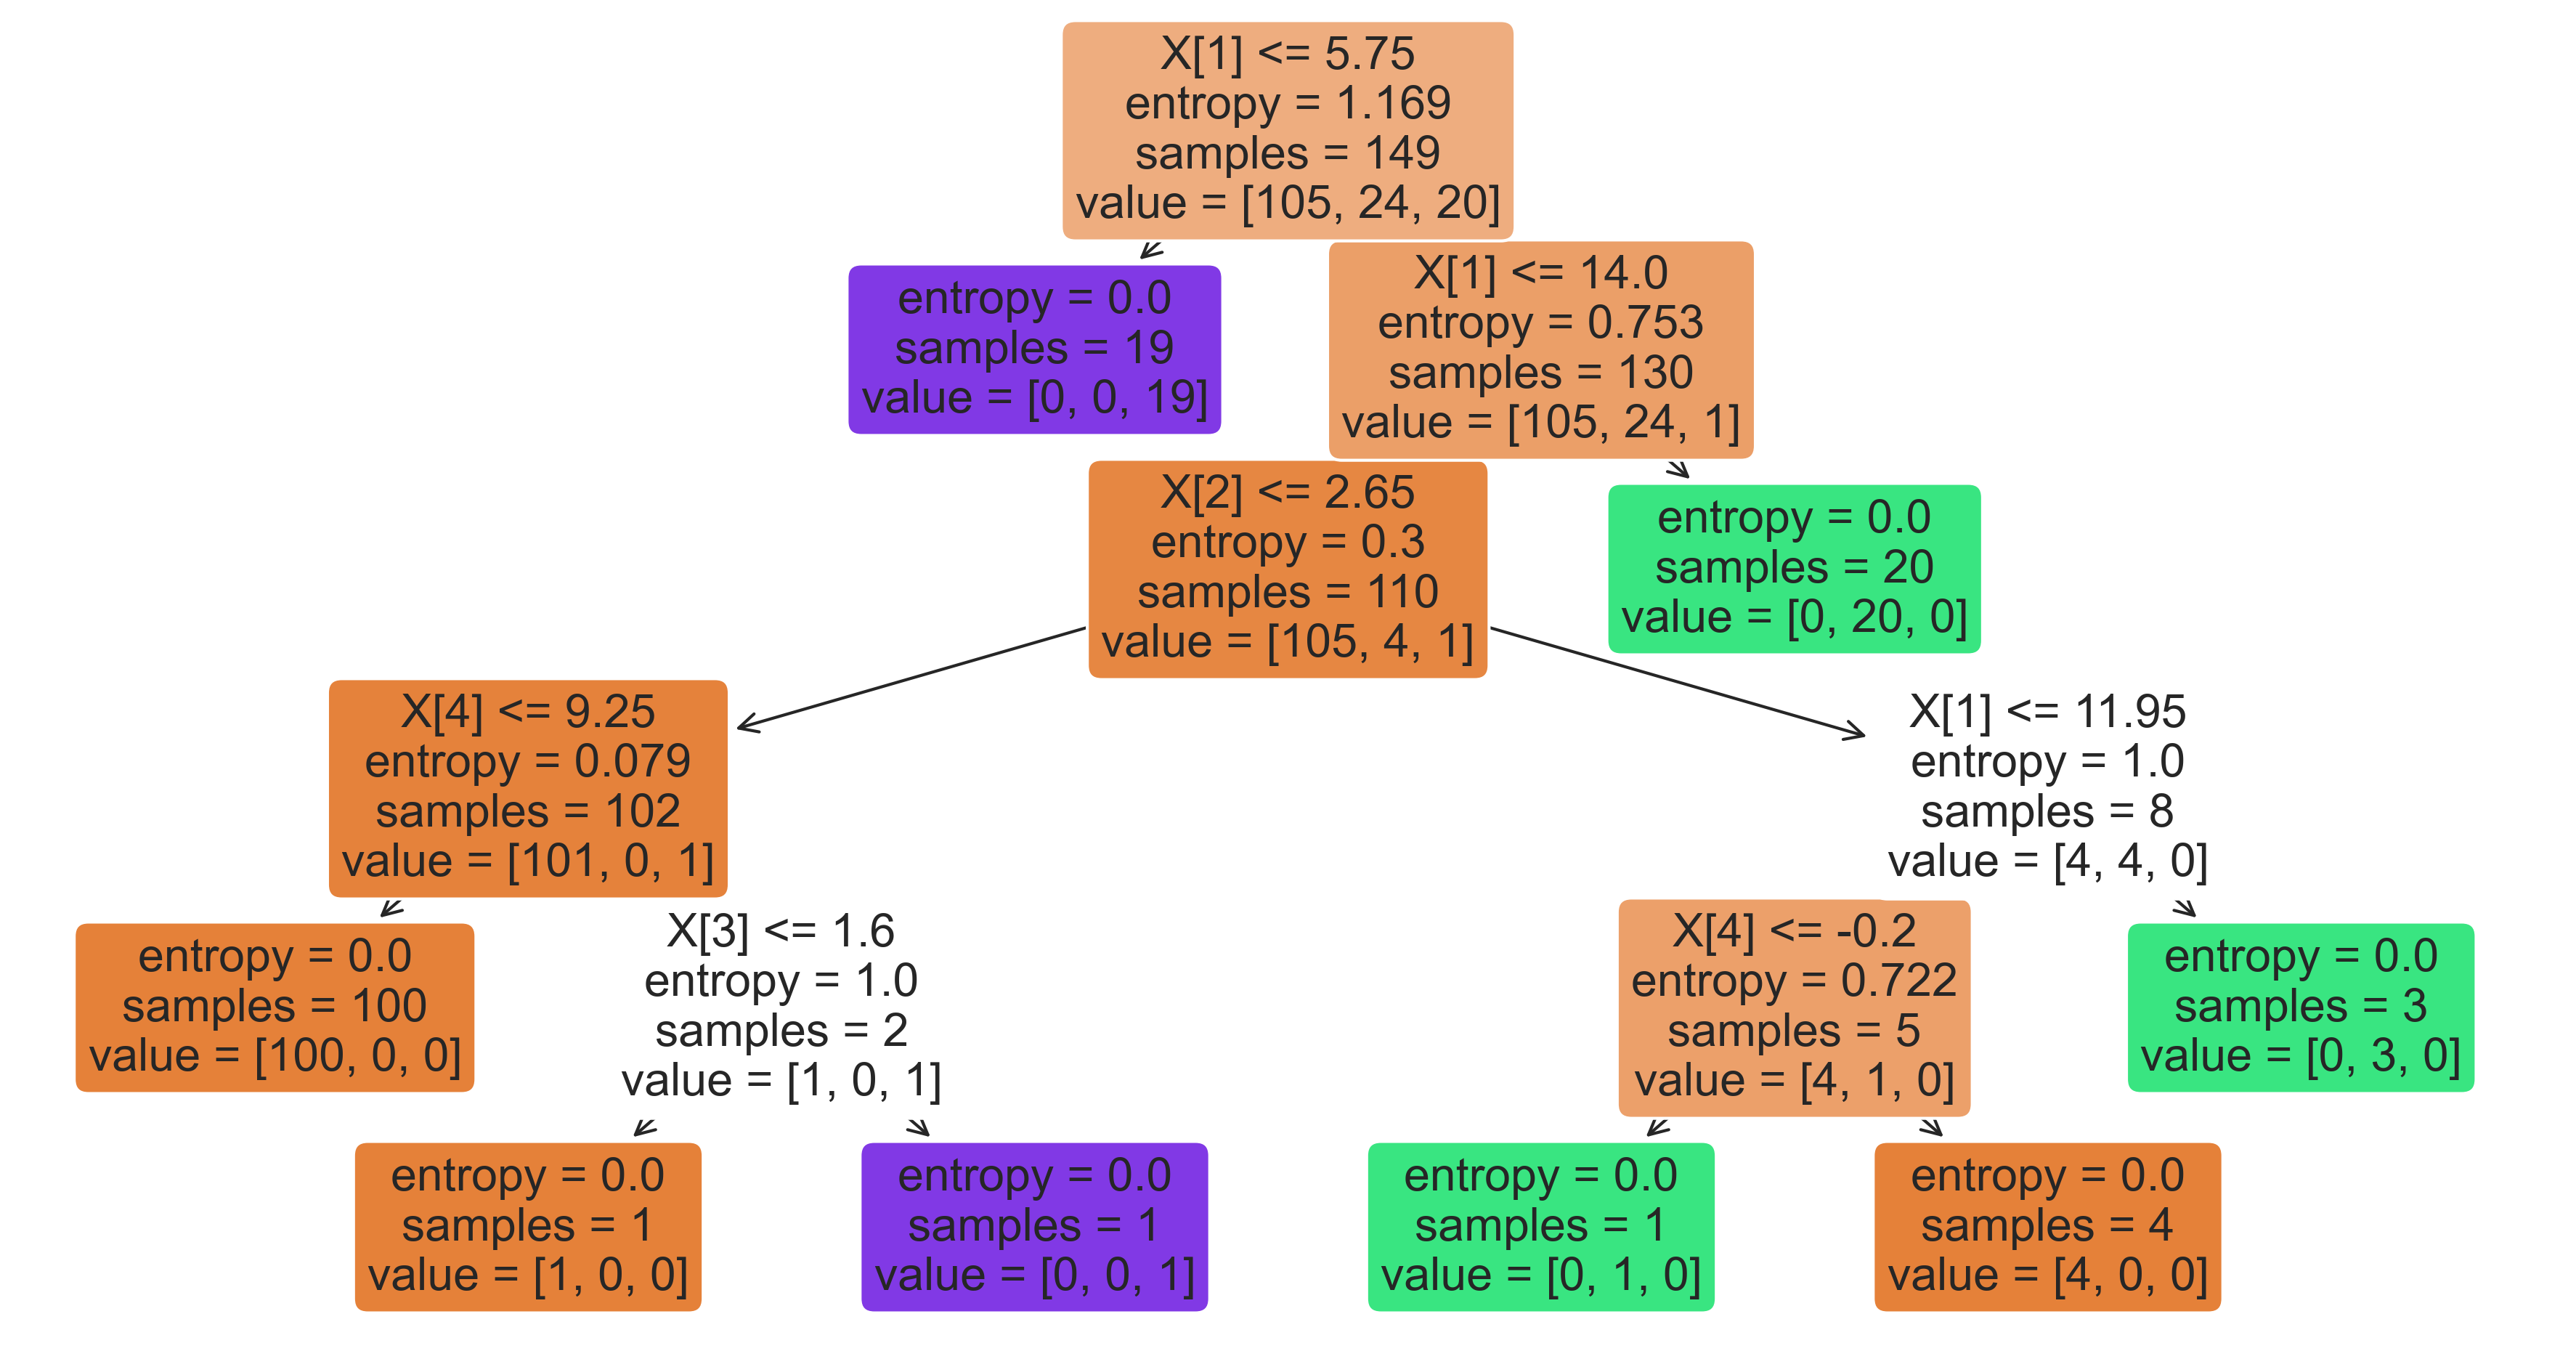

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300)      #plotting the tree map
tree.plot_tree(model,filled = True,rounded=True);

### Support Vector Machine

##### Initializing the model

In [31]:
svc_model=SVC()                           #initializing the svm model

##### Training the model

In [32]:
svc_model.fit(X_train,y_train.values.ravel())   # training model

SVC()

##### Predicting

In [33]:
svm_predictions=svc_model.predict(X_test)            #predicting the gland

##### Comparison

In [34]:
actual=y_test['Label']                                                            # Making a copy of label test data into actual data
comparison = pd.DataFrame({"Actual":actual,"Predicted":svm_predictions})          # making them into a dataframe
comparison                                                                        # Previewing the Dataframe

,Actual,Predicted
162,2,1
183,2,1
9,1,1
100,1,1
177,2,1
...,...,...
139,1,1
105,1,1
133,1,1
109,1,1


### Evaluation

##### Confusion matrix of SVM Before Tuning

<AxesSubplot:>

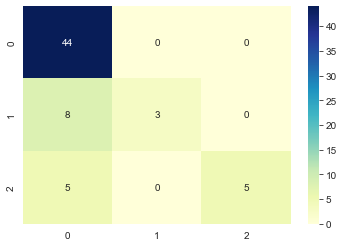

In [35]:
#SVM
cnf_matrix=confusion_matrix(y_test,svm_predictions)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

##### Classification Report

In [36]:
print(classification_report(y_test,svm_predictions)) #printing the classification report

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        44
           2       1.00      0.27      0.43        11
           3       1.00      0.50      0.67        10

    accuracy                           0.80        65
   macro avg       0.92      0.59      0.66        65
weighted avg       0.85      0.80      0.76        65



##### Storing Accuracy of SVM Before Tuning

In [37]:
svm_beforetuning=metrics.accuracy_score(y_test,svm_predictions)

### Tuning the Model using Grid Search

#### Hyper Parameter Tuning Using Grid Search

In [38]:
grid_parameters = {'C': [0.001,0.1,1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}  # Dictionary containing hyperparameters to be tuned and their values to be tested 

##### Initializing the Grid search

In [39]:
# SCV() is estimator
grid = GridSearchCV(SVC(),grid_parameters,verbose=1) # verbose set to greater than 1 to get the output messages, when the model is being tuned

##### Training the Model

In [40]:
grid.fit(X_train,y_train.values.ravel()) # traning the model with the help og hyperparameters

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=1)

##### Predicting the label

In [41]:
grid_predictions = grid.predict(X_test)     #Predicting the Label

### Evaluation

##### Comparision

In [42]:
actual=y_test['Label']                                                            # Making a copy of label test data into actual data
comparison = pd.DataFrame({"Actual":actual,"Predicted":grid_predictions})         # making them into a dataframe
comparison                                                                        # Previewing the Dataframe

,Actual,Predicted
162,2,2
183,2,2
9,1,3
100,1,1
177,2,2
...,...,...
139,1,1
105,1,1
133,1,1
109,1,1


##### Confusion Matrix of SVM Model After Tuning

<AxesSubplot:>

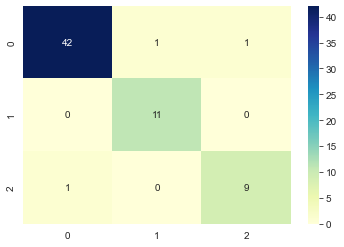

In [43]:
#SVM
cnf_matrix=confusion_matrix(y_test,grid_predictions)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

##### Classification report of SVM After Tuning

In [44]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.98      0.95      0.97        44
           2       0.92      1.00      0.96        11
           3       0.90      0.90      0.90        10

    accuracy                           0.95        65
   macro avg       0.93      0.95      0.94        65
weighted avg       0.95      0.95      0.95        65



##### Storing Accuracy After Tuning of SVM Model

In [45]:
svm_aftertuning=metrics.accuracy_score(y_test,grid_predictions)

### KMeans Clustering

In [46]:
X=file.loc[:,['T3','TSH','Maximal Absolute Difference','TST']]     

##### Elbow Plot

C:\Users\vamse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Plot')

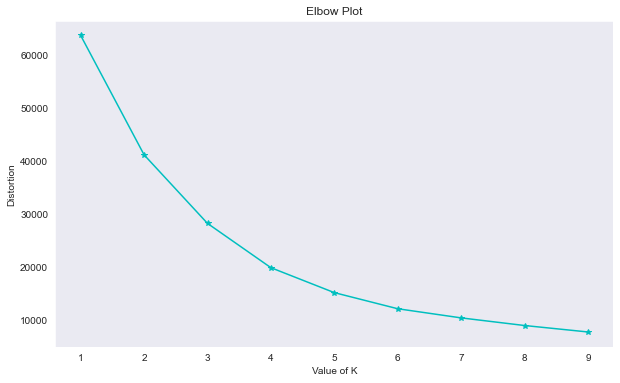

In [47]:
plt.figure(figsize=(10,6))                                     
distortions = []                              # initializing the list
K = range(1,10)                               # k values ranges from 0-9 
for k in K:
    kmeanModel = KMeans(n_clusters=k)         # initializing KMeans
    kmeanModel.fit(X)                         # clustering
    distortions.append(kmeanModel.inertia_)   # Inertia is the sum of squared error for each cluster
plt.plot(K, distortions, 'c*-')               # plotting the k values with star marks
plt.grid(False)                               # making the grid lines false
plt.xlabel('Value of K')                      # x labelling
plt.ylabel('Distortion')                      # y labelling
plt.title('Elbow Plot')                       # adding title

#### Here K=3

##### Initializing the Kmeans

In [48]:
kmeans = KMeans(n_clusters = 3, random_state=101)   # number of clusters set to 5

##### Copying the output label into new variable for comparison

In [49]:
y=kmeans.fit_predict(X)                             #predicting the clustering vales
k=p['Label']                                        #preparing the label
k=pd.DataFrame(k)                                   #coverting into dataframe
k["Label"].replace({1: 0, 2: 1,3:2}, inplace=True)  #replacing the column values
z=k['Label']                                        #copying the variable
z                                                   #previewing

0      0
1      0
2      0
3      0
4      0
      ..
209    2
210    2
211    2
212    2
213    2
Name: Label, Length: 214, dtype: int64

##### Getting the Clusters

In [50]:
clusters=kmeans.labels_    #adding the labels to the variable
clusters                   #previewing

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0])

##### Getting the Centers

In [51]:
centers = kmeans.cluster_centers_      #finding the centriods of the clusters.
centers                                #previewing the centriods

array([[112.23684211,   1.31118421,   2.58618421,   9.54144737],
       [ 89.94871795,   1.16153846,   0.95128205,  14.71794872],
       [125.56521739,  16.24782609,  20.43043478,   3.2       ]])

##### Scatterplot for comparison of actual VS Predicted

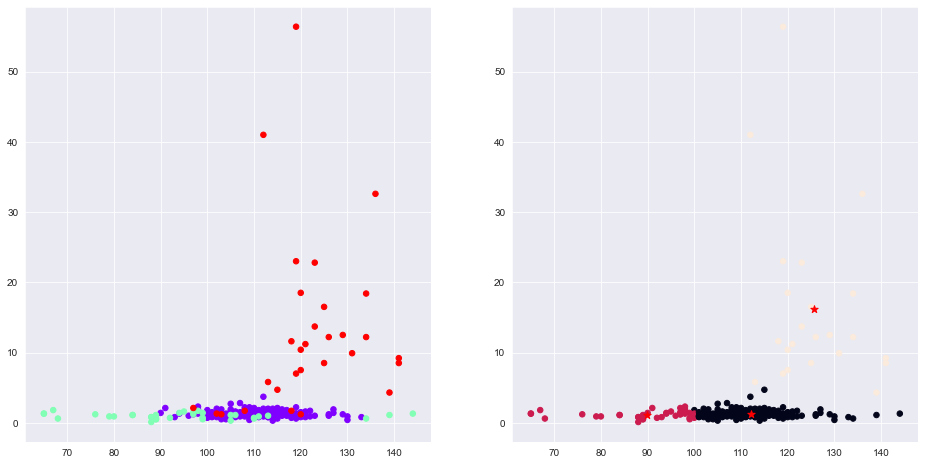

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
# plotting actual taget species for reference(picked up from dataset)
C1=axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=z, cmap='rainbow', s=30)   
# plotting clusters formed by our algorithm
C2=axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, s=30)
# plotting centroids for the clusters
C3=axes[1].scatter(centers[:,0],centers[:,1],marker="*",color="red",s=60)

#### Plotting the scatter plot of predicted clusters

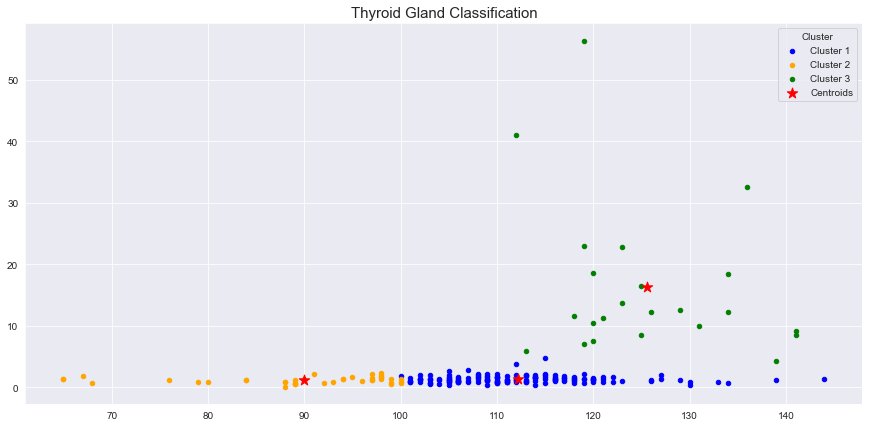

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(X.iloc[y == 0, 0], X.iloc[y == 0, 1], s = 20, c = 'b', label = 'Cluster 1')             #plottiing cluster 1
plt.scatter(X.iloc[y == 1, 0], X.iloc[y == 1, 1], s = 20, c = 'Orange', label = 'Cluster 2')        #plottiing cluster 2
plt.scatter(X.iloc[y == 2, 0], X.iloc[y == 2, 1], s = 20, c = 'Green', label = 'Cluster 3')         #plottiing cluster 3
plt.scatter(centers[:, 0], centers[:, 1], s = 120, c = 'Red', label = 'Centroids',marker = '*')     #adding centers to the scatterplot
plt.title('Thyroid Gland Classification',fontsize=15)                                               #adding title to the scatter plot
plt.legend(title = 'Cluster')                                                                       #Adding title to the legend
plt.show()                                                                                          #previewing the scatterplot

### Evaluation 

##### Confusion matrxi of Kmeans

<AxesSubplot:>

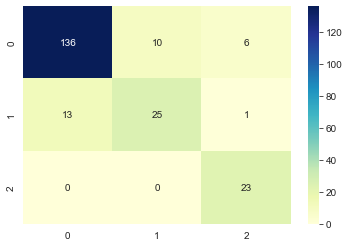

In [54]:
#Kmeans
cnf_matrix=confusion_matrix(clusters,z)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

##### Classification Report

In [55]:
print(classification_report(clusters,z))                #printing the classification report

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.71      0.64      0.68        39
           2       0.77      1.00      0.87        23

    accuracy                           0.86       214
   macro avg       0.80      0.85      0.82       214
weighted avg       0.86      0.86      0.86       214



##### Storing the Accuracy

In [56]:
KMeans_Accuracy=metrics.accuracy_score(clusters,z)         # Storing the Accuracy

### Visually compare the performance of all classifiers

In [57]:
Accuracy=[Logistic_Accuracy,Decision_Accuracy,svm_beforetuning,svm_aftertuning,KMeans_Accuracy]                  #storing all the accuracy into list
Models=['Logistic Regression','Decision Tree','SVM Before Tuning','SVM After Tuning','Kmeans Clustering']        #Storing the names of the classifiers in the list
compare=pd.DataFrame()                                   #initializing a dataframe
compare['Classifier Name']=Models                        #adding models list to the dataframe
compare['Accuracy']=Accuracy                             #adding accuracy column to the dataframe
compare                                                  #preveiwing

,Classifier Name,Accuracy
0,Logistic Regression,0.969231
1,Decision Tree,0.892308
2,SVM Before Tuning,0.800000
3,SVM After Tuning,0.953846
4,Kmeans Clustering,0.859813


In [58]:
score=sns.light_palette('blue',as_cmap=True)                    #setting style to the cmap
s=compare.style.background_gradient(cmap=score)                 #previewing the dataframe
s

,Classifier Name,Accuracy
0,Logistic Regression,0.969231
1,Decision Tree,0.892308
2,SVM Before Tuning,0.800000
3,SVM After Tuning,0.953846
4,Kmeans Clustering,0.859813


In [59]:
Accuracies=np.array(Accuracy)                            #initializing the numpy array and storing the accuracy in it
Accuracies=np.multiply(Accuracies,100)                   #converting into percentage
Accuracies=np.round(Accuracies,2)                        #rounding to 2 decimal points

### Barplot visualization for comparision of classifiers performance

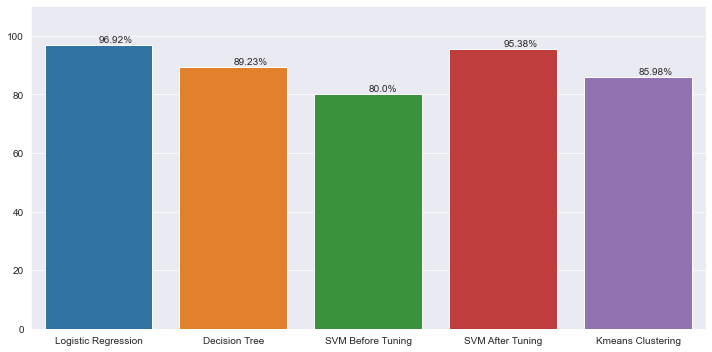

In [60]:
plt.figure(figsize=(10,5))                                                         #resizing the graph
sns.barplot(x=Models,y=Accuracies)                                                 #plotting barplot
plt.ylim((0,110))                                                                  #Setting ylimit
for index,data in enumerate(Accuracies):                                           #entering into for loop for adding text to barplot
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))      #adding text
plt.tight_layout()                                                         
plt.show()                                                                

#### Based on the best possible tuning for all the different classifiers, summarize the most suited classifier for the application and discuss the characteristics of each classifier.

In conclusion, To predict the thyroid gland We have made use of ***Logistic regression***,***Decision Tree***, and ***SVM Model*** to train our dataset and to predict thyroid disease with more accuracy.

So we can any one of the three Classifiers to get the desired output.

#### Future Scope of Improvement in the algorithms
This machine is trained to detect whether the person is having normal, hyper, hypo thyroidism based on the user's input. Further Development can be done by using image processing to predict thyroid nodules and cancer which cannot be recognized in blood test report.

So by Combining both ideas and results, thyroid disease prediction can cover all thyroid related dieseases.

# END